## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [513]:
!pip install ucimlrepo

In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [515]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [516]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
43136,77,retired,married,primary,no,680,no,no,telephone,24,feb,513,2,89,7,failure
9001,46,technician,married,secondary,no,488,no,no,NaN,5,jun,92,1,-1,0,NaN
25702,46,blue-collar,married,secondary,no,9347,yes,no,cellular,19,nov,138,1,117,1,other
43692,59,management,married,tertiary,no,138,yes,yes,cellular,13,may,106,1,280,4,failure
41853,51,admin.,married,secondary,no,423,yes,yes,cellular,16,oct,95,1,-1,0,NaN


In [517]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [518]:
# 1.1How many NaN values are there in the dataset?
df.isna().sum().sum()

52124

In [519]:
# 1.2 What is the highest number of NaN values in a single column?
df.isna().sum().max()

36959

In [520]:
# 1.3 What is the name of the column with the smallest number (>0) of NaN values?
smallest__NaN_col = df.isna().sum()
smallest__NaN_col = smallest__NaN_col[smallest__NaN_col > 0]
smallest__NaN_col = smallest__NaN_col[smallest__NaN_col == smallest__NaN_col.min()].index[0]
print(smallest__NaN_col)
df.dtypes

job


age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

In [521]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
cat_columns = df.select_dtypes(include = ['object', 'category']).columns
df[cat_columns] = df[cat_columns].fillna('unknown')
# for numerical columns (if any) fill with column mean value
num_columns = df.select_dtypes(include = ['int64']).columns
for column in num_columns:
    mean_val = df[column].mean()
    df[column] = df[column].fillna(mean_val)
# print(df.isna().sum())
# print(df['job'].head(5))
# print(df.dtypes)

<ipython-input-521-e9611f096b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].fillna('unknown')
<ipython-input-521-e9611f096b96>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(mean_val)


-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [522]:
y.head(5)

,y
0,no
1,no
2,no
3,no
4,no


In [523]:
accepted_depo = (y['y'] == 'yes').sum()
total_rows = len(y)
fraction_accepted_depo = accepted_depo / total_rows
print(fraction_accepted_depo)

0.11698480458295547


-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [524]:
# In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
df['y'] = y['y']
# df.head(3)
# 3.3 What is the least successful marital category?
# accepted_depo = (y['y'] == 'no').sum()
print('accepted_depo = ', accepted_depo)
success_rate = df.groupby('marital')['y'].apply(lambda x: (x == 'yes').mean())
min_suc_marital = success_rate[success_rate == success_rate.min()]
print(min_suc_marital.index[0])
total_rows = len(y)
fraction_accepted_depo = accepted_depo / total_rows

accepted_depo =  5289
married


In [525]:
#3.4 List top 3 most successful job categories in alphabetical order
success_rate = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean())
top3_suc_jobs = success_rate.sort_values(ascending=True).head(3).index.sort_values().to_list()
print(top3_suc_jobs)

['blue-collar', 'entrepreneur', 'housemaid']


In [526]:
#3.6 Find the job with the smallest median balance. The answer is this job's median balance.
df.groupby('job')['balance'].median().min()

339.5

In [527]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [528]:
# TODO map y (target) values to 0 / 1
df['y'] = df['y'].map({'yes': 1, 'no': 0})
y['y'] = y['y'].map({'yes': 1, 'no': 0})
# success_num = df[df['y'] == 1].sum()
# fail_num = df[df['y'] == 0].sum()
# success_rate = (success_num / len(df['y']))
# print(success_rate)
print(df['y'])
print(y['y'])

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


<ipython-input-528-2bf5cc9a8796>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].map({'yes': 1, 'no': 0})


In [529]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [530]:
# TODO map binary columns' values to 0 / 1
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})

In [531]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

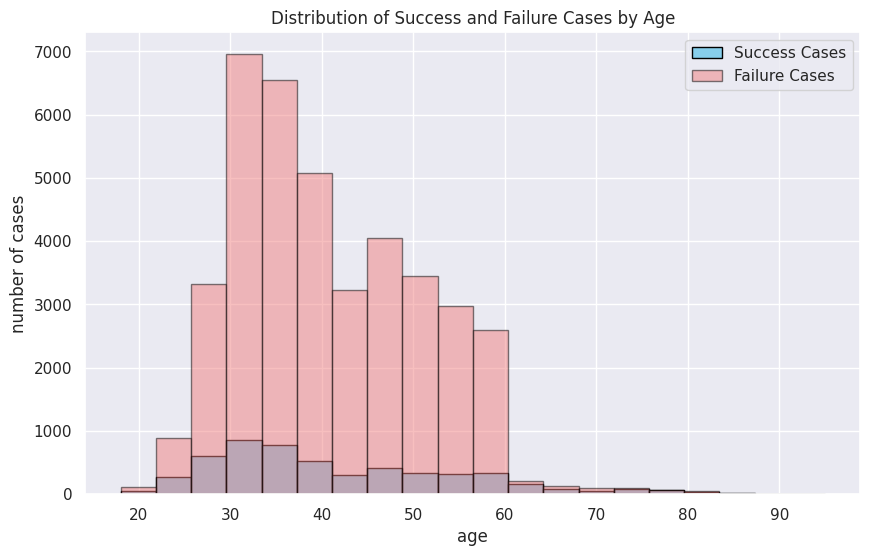

In [532]:
# !!! Answer
# A?
# !!!

success_cases = df[df['y'] == 1]
fail_cases = df[df['y'] == 0]
# Group by the 'age' column and count the number of success cases for each age
s_c = success_cases['age']
f_c = fail_cases['age']
plt.figure(figsize=(10, 6))

plt.hist(s_c, bins=20, color='skyblue', edgecolor='black', alpha=1, label='Success Cases')
plt.hist(f_c, bins=20, color='lightcoral', edgecolor='black', alpha=0.5, label='Failure Cases')

plt.title('Distribution of Success and Failure Cases by Age')
plt.xlabel('age')
plt.ylabel('number of cases')
plt.legend()

plt.show()

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

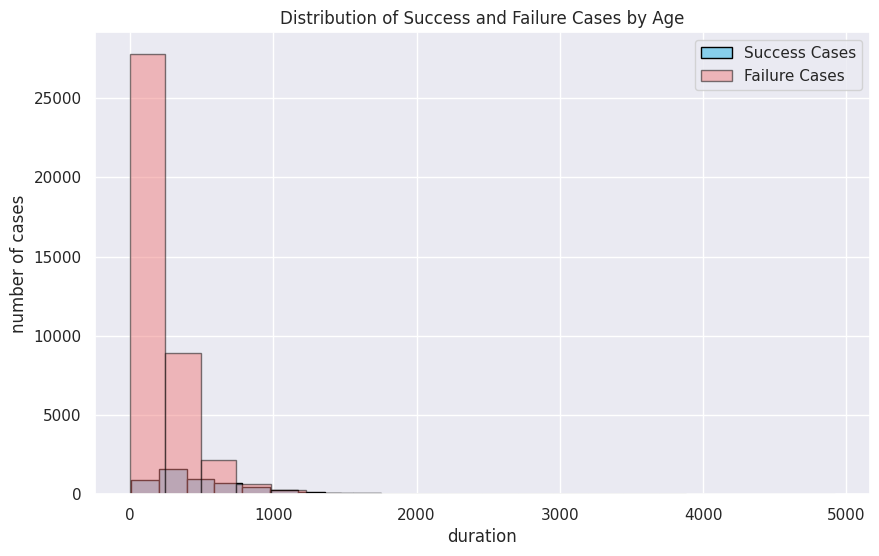

In [533]:
# !!! Answer
# A?
# !!!

success_cases = df[df['y'] == 1]
fail_cases = df[df['y'] == 0]
# Group by the 'duration' column and count the number of success cases for each age
s_c = success_cases['duration']
f_c = fail_cases['duration']
plt.figure(figsize=(10, 6))

plt.hist(s_c, bins=20, color='skyblue', edgecolor='black', alpha=1, label='Success Cases')
plt.hist(f_c, bins=20, color='lightcoral', edgecolor='black', alpha=0.5, label='Failure Cases')

plt.title('Distribution of Success and Failure Cases by Age')
plt.xlabel('duration')
plt.ylabel('number of cases')
plt.legend()

plt.show()

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [534]:
# TODO define numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_cols = [col for col in num_cols if set(df[col]) <= {0, 1}]

# Define a list of non-binary numerical columns
non_binary_num_cols = [col for col in num_cols if col not in binary_cols]
print(len(non_binary_num_cols))

7


-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [535]:
# 8.3 duration
corr_duration = df['y'].corr(df['duration'])
print(corr_duration)

0.39452101589456207


In [536]:
# 8.5 What numerical feature has the highest Pearson correlation with the target variable?
print(non_binary_num_cols)
# Create a dictionary to store the correlations for each feature
corrs = {}

# Compute Pearson correlation for each numerical feature
for feat in non_binary_num_cols:
    corr = df['y'].corr(df[feat])
    corrs[feat] = corr

# Find the feature with the highest correlation
highest_corr_feature = max(corrs, key=corrs.get)
highest_corr_value = corrs[highest_corr_feature]

print(highest_corr_feature)
# print(highest_corr_value)

['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
duration


In [537]:
print(df['campaign'].max())
print(df['pdays'].max())

print(df['previous'].max())

63
871
275


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

In [538]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [539]:
df.groupby(df['y'])['y'].head()

0      0
1      0
2      0
3      0
4      0
83     1
86     1
87     1
129    1
168    1
Name: y, dtype: int64

In [540]:
import seaborn as sns

# Add the 'y' column (target variable) to the list
non_binary_num_cols.append('y')

# Create a pairplot
# sns.pairplot(df[non_binary_num_cols], hue='y', diag_kind='kde')
# plt.show()


##change description of observations!!!

After generating the pairplot, we can analyze the results and make observations about the relationships between numerical variables and the success (target variable). Look for patterns, clusters, or separations that might indicate how numerical features are related to the target variable.

We can write your observations and conclusions in a Markdown cell in your notebook based on the patterns you see in the pairplot. For example, you can comment on whether certain numerical features appear to be correlated with the target variable, or if there are clear distinctions between success and failure cases based on these numerical features.

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [541]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [542]:
df['pcontact'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)
print(df['pcontact'].unique())


[0 1]


------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [543]:
df = df.drop('y', axis = 1)

-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

In [544]:
df.dtypes
# df.head()

age             int64
job            object
marital        object
education      object
default         int64
balance         int64
housing         int64
loan            int64
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
pcontact        int64
dtype: object

In [545]:
# TODO add one-hot labels and drop columns
cat_cols = df.select_dtypes(include = ['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [546]:
df.dtypes


age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day_of_week            int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
pcontact               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun     

## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [547]:
from sklearn.model_selection import train_test_split

X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [548]:
df.head()

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [549]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)



In [550]:
df.head(50)

,age,default,balance,housing,loan,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
7,42,1,2,1,0,5,380,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
8,58,0,121,1,0,5,50,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
9,43,0,593,1,0,5,55,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [551]:
# len(X_train_scaled) / len(X_test_scaled)

## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [552]:
X_train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'pcontact',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [553]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 3 features
selector = SelectKBest(score_func=f_classif, k=3)

# Fit the selector on your training data (X_train, y_train)
selector.fit(X_train, y_train)

# Get the feature scores and indices
feature_scores = selector.scores_
selected_feature_indices = selector.get_support(indices=True)

# Create a DataFrame to hold the feature names and their scores
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Score': feature_scores})

# Sort the features by their scores in descending order
sorted_feature_df = feature_df.sort_values(by='Score', ascending=False)

# Select the top 3 features
top_feature_names = sorted_feature_df['Feature'].head(3).tolist()

# Print the top 3 feature names
print(f"Top {3} features by ANOVA with f_classif:")
for feature in top_feature_names:
    print(feature)


Top 3 features by ANOVA with f_classif:
duration
poutcome_success
pcontact


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc

In [555]:
# Define the range of C values to search
C_range = np.logspace(-2, 4, 7)

# Create a parameter grid
param_grid = {'C': C_range}

# Create the logistic regression model with L2 penalty
log_reg = LogisticRegression(penalty='l2', max_iter=400)

# Create a GridSearchCV object to find the best C value
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [556]:
# Q16.1 What is an optimal C for l2 regularization?
print(f"Optimal C for L2 regularization: {best_C}")

Optimal C for L2 regularization: 10000.0


In [557]:
# Q16.2 What is the accuracy for this params?
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for the best model: {accuracy}")

# Q16.3 What is the three most important features by logistic regression estimation?
feat_importances = abs(best_model.coef_[0])
top3_feature_indices = feat_importances.argsort()[-3:][::-1]

print("Three most important features:")
for index in top3_feature_indices:
    feat_name = X_train.columns[index]
    print(feat_name)
    # print(feat_name, feat_importances[index])

Accuracy for the best model: 0.8954992812119872
Three most important features:
poutcome_success
poutcome_unknown
housing


In [558]:
# 16.4 - Build ROC curve and calculate ROC-AUC score
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# roc_curve(y_test, y_prob) computes the Receiver Operating Characteristic (ROC) curve. It takes the true labels y_test and the predicted probabilities y_prob.
# fpr (False Positive Rate) is an array that contains the false positive rates for different threshold values.
# tpr (True Positive Rate or Sensitivity) is an array that contains the true positive rates for different threshold values.
# _ for ignoring treshold values
# auc(fpr, tpr) calculates the Area Under the Curve (AUC) for the ROC curve.
# 16.4 - ROC-AUC score
print(f"ROC-AUC score: {roc_auc}")

ROC-AUC score: 0.8893135393479115


The ROC-AUC score represents the overall performance of a binary classification model. It measures the ability of the model to distinguish between the positive and negative classes. The ROC-AUC score summarizes the performance of your logistic regression model in terms of its ability to discriminate between the positive and negative classes. A higher ROC-AUC score generally indicates better model performance.

------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [559]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, recall_score, precision_score

1st try: 9min 55sec

2nd try(with n_jobs = -1) = 5 min

success try(also with smaller grid) = 1min

Advice from Q/A chat:

"Please use the following grid for Random Forest: depth=[5, 10, 15], number of trees=[50, 100, 200]. If you did the task with the previous grid, it is also ok"

In [560]:
print(y_train)
# Check the type
if type(y_train) == pd.DataFrame:
    print("It's a DataFrame")
if type(y_train) == pd.Series:
    print("It's a Series")
print(y_test)

       y
3344   0
17965  0
18299  0
10221  0
32192  1
...   ..
11284  1
44732  0
38158  0
860    0
15795  0

[36168 rows x 1 columns]
It's a DataFrame
       y
3776   0
9928   0
33409  0
31885  0
15738  0
...   ..
13353  0
38732  1
5654   0
3779   0
11677  0

[9043 rows x 1 columns]


In [561]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],     # num 0f trees
    'max_depth': [5, 10, 15]            # depth
}

# Fix a warning
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs = -1)

# Create a GridSearchCV object to find the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 17.1 - Optimal depth and number of trees
optimal_depth = best_params['max_depth']
optimal_num_trees = best_params['n_estimators']
print(f"Q17.1: Optimal depth: {optimal_depth}, Optimal number of trees: {optimal_num_trees}")

# Make predictions on the test data
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# 17.4 Calculate the highest recall for precision > 0.5
recall_at_precision_05 = max(recall[precision >= 0.5])
print(f"Q17.4: Highest recall for precision > 0.5: {recall_at_precision_05}")

# 17.5 Calculate the precision for a specific binarization threshold, e.g., threshold=0.3
threshold = 0.3
precision_at_threshold = precision[np.where(thresholds >= threshold)][0]
print(f"Q17.5: Precision for binarization threshold={threshold}: {precision_at_threshold}")


Q17.1: Optimal depth: 15, Optimal number of trees: 200
Q17.4: Highest recall for precision > 0.5: 0.7772685609532539
Q17.5: Precision for binarization threshold=0.3: 0.5644310474755087


In [562]:
# 17.2 - ROC-AUC score for the best model
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Q17.2: ROC-AUC for the best model: {roc_auc}")

Q17.2: ROC-AUC for the best model: 0.9262942457679163


In [563]:
from sklearn.metrics import f1_score

In [564]:
# Calculate f1_score
f1_score_rf = f1_score(y_test, y_pred)
print(f"F1 score for the random forest: {f1_score_rf}")

F1 score for the random forest: 0.41486068111455116


In [565]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for the best model: {accuracy}")

Accuracy for the best model: 0.8954992812119872


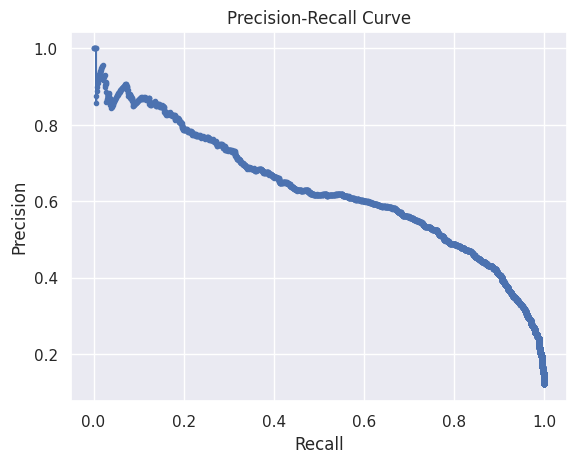

Q17.7: Three most important features:
duration 0.32987768826120645
poutcome_success 0.08649387216053395
age 0.0769488610777739


In [566]:
# Plot the precision-recall curve (optional)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 17.7 - Get feature importances from the random forest model
feature_importances = best_model.feature_importances_
top_feature_indices = feature_importances.argsort()[-3:][::-1]

# 17.7 - Three most important features
print("Q17.7: Three most important features:")
for index in top_feature_indices:
    feature_name = X_train.columns[index]  # Get the feature name from the dataset
    print(feature_name, feature_importances[index])

-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [567]:
# Select the top-30 features from the dataset
X_train_top_30 = X_train.iloc[:, top_feature_indices]
X_test_top_30 = X_test.iloc[:, top_feature_indices]

# Train a random forest model again on the reduced feature set
# Create a new random forest classifier with the same parameters
rf_reduced = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the new model on the reduced feature set
rf_reduced.fit(X_train_top_30, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [568]:
from sklearn.metrics import f1_score

In [569]:
# 18.1 What is the roc-auc score for this model?
y_prob_reduced = rf_reduced.predict_proba(X_test_top_30)[:, 1]
roc_auc_reduced = roc_auc_score(y_test, y_prob_reduced)
print(f"18.1: ROC-AUC score for the model with top-30 features: {roc_auc_reduced}")

# 18.2 What is the f1 score for this model?
y_pred_reduced = rf_reduced.predict(X_test_top_30)
f1_score_reduced = f1_score(y_test, y_pred_reduced)
print(f"18.2: F1 score for the model with top-30 features: {f1_score_reduced}")

# Calculate accuracy
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy for the the model with top-30 features: {accuracy_reduced}")

# Get feature importances from the random forest model with top-30 features
feature_importances_with30 = rf_reduced.feature_importances_
top_feature_indices_with30 = feature_importances_with30.argsort()[-3:][::-1]

# Print the results
print("Three most important features for the the model with top-30 features:")
for index in top_feature_indices_with30:
    feature_name = X_train.columns[index]  # Get the feature name from the dataset
    print(feature_name, feature_importances_with30[index])

18.1: ROC-AUC score for the model with top-30 features: 0.8585209123669606
18.2: F1 score for the model with top-30 features: 0.44638694638694637
Accuracy for the the model with top-30 features: 0.8949463673559659
Three most important features for the the model with top-30 features:
age 0.6129681715798166
default 0.23574752176241484
balance 0.1512843066577685


In [570]:
# Compare ROC-AUC, f1_score and accuracy for models
print(f"ROC-AUC for the best model: {roc_auc}")
print(f"ROC-AUC score for the model with top-30 features: {roc_auc_reduced}\n")
print(f"F1 score for the random forest: {f1_score_rf}")
print(f"F1 score for the model with top-30 features: {f1_score_reduced}\n")
print(f"Accuracy for the best model: {accuracy}")
print(f"Accuracy for the the model with top-30 features: {accuracy_reduced}")

ROC-AUC for the best model: 0.9262942457679163
ROC-AUC score for the model with top-30 features: 0.8585209123669606

F1 score for the random forest: 0.41486068111455116
F1 score for the model with top-30 features: 0.44638694638694637

Accuracy for the best model: 0.8954992812119872
Accuracy for the the model with top-30 features: 0.8949463673559659


## Answer 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

ROC-AUC: When the ROC-AUC score decreases after feature selection, it suggests that the model's ability to distinguish between positive and negative classes at different thresholds has slightly declined. This means that the model may be less effective at ranking instances by their predicted probability after feature selection.

F1 Score: An increase in the F1 score after feature selection indicates an improvement in the model's balance between precision and recall. In other words, it has become better at reducing both false positives and false negatives, resulting in higher overall accuracy.


Based on the results, it seems that the classification quality didn't improve much after selecting the top-30 features. The scores for the model with these features are similar to or slightly lower than the scores for the best model without feature selection. This suggests that the original model was already performing well, and selecting specific features didn't make a big difference. So, it's safe to say that the classification quality stayed fairly consistent before and after feature selection.

------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

In [571]:
# Three most important features
print("Three most important features:")
for index in top_feature_indices:
    feature_name = X_train.columns[index]  # Get the feature name from the dataset
    print(feature_name, feature_importances[index])

print("Three most important features for the the model with top-30 features:")
for index in top_feature_indices_with30:
    feature_name = X_train.columns[index]  # Get the feature name from the dataset
    print(feature_name, feature_importances_with30[index])


Three most important features:
duration 0.32987768826120645
poutcome_success 0.08649387216053395
age 0.0769488610777739
Three most important features for the the model with top-30 features:
age 0.6129681715798166
default 0.23574752176241484
balance 0.1512843066577685


### For the initial random forest model (with all features):

Duration (0.33): Call duration matters as longer calls can affect a client's decision.
Poutcome_Success (0.0865): Success from past campaigns is important; clients who responded positively before are likely to do so again.
Age (0.077): Age plays a role, older clients may decide differently.

###For the random forest model with the top-30 features:

Age (0.613): Age remains the most crucial, regardless of feature reduction.
Default (0.236): Whether a client has credit in default is highly relevant.
Balance (0.151): Client balance is an important factor.

###Analysis:

- "Duration" drops out of the top-3 features in the reduced model, suggesting overlap with other factors.
- "Age" is consistently important, emphasizing its significance.
- "Poutcome_Success" is no longer in the top-3, indicating other features provide similar information.
- "Default" and "Balance" become more prominent in the reduced model, showing their importance when other features are excluded.

In simple terms, the change in feature importance between the two models highlights the impact of feature selection. It's crucial to consider the context and dataset when interpreting feature importance.

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`